# From Excel to Jupyter (and the wonder of easy boxplots!)
### Maria Inês Silva
### 2020-03-14

***

Let's start by importing the necessary python packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now we can use `read_excel` from pandas to read the foreign exchange data from the excel file. Recall that the data file
in the same directory as the notebook. If you don't create the notebook in the same directory, you'll need to change the 
path to excel file.

In [2]:
# Read the excel data into a pandas dataframe
data_df = pd.read_excel("data.xlsx",  na_values=['ND'])
# Print the first 5 rows
data_df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In this DataFrame, we have daily foreign exchange rates between the dollar and 22 other currencies. The goal of this analysis is to compare the foreign exchange rates between the US Dollar and the Scandinavian currencies. So let's start to investigate exactly which foreign exchange rates we have in our data.

We can do this by check the dataframe's column names:

In [3]:
data_df.columns

Index(['Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

So, from these, we are interested in the following columns:

* DENMARK - DANISH KRONE/US
* NORWAY - NORWEGIAN KRONE\US
* SWEDEN - KRONA/US

Before plotting, we'll need to do some data cleaning:

1. Select the columns we are interested in
2. Rename those column to appear in plots as desired
3. Unpivot the table in order to plot all the foreign exchange rates together in the same chart


In [4]:
columns_to_keep = ['DENMARK - DANISH KRONE/US$', 'NORWAY - NORWEGIAN KRONE/US$', 'SWEDEN - KRONA/US$']
new_column_names = ["Danish Krone", "Norwegian Krone", "Swedish Krone"]

# Select columns
clean_data_df = data_df[columns_to_keep]
# Change columns names
clean_data_df.columns = new_column_names
# Unpivot
clean_data_df = clean_data_df.melt(var_name="Currency", value_name="Rate")
# Check first 5 elements
clean_data_df.head()

,Currency,Rate
0,Danish Krone,7.3290
1,Danish Krone,7.2180
2,Danish Krone,7.2080
3,Danish Krone,7.2125
4,Danish Krone,7.2285


And now, we are ready to plot the boxplots using Seaborn:

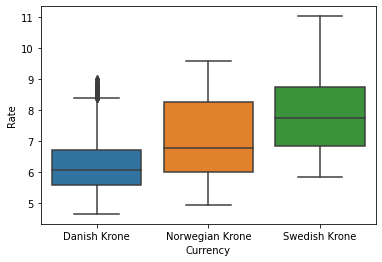

In [5]:
sns.boxplot(x="Currency", y="Rate", data=clean_data_df)
plt.show()

And that's it!